In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl

from MyPhidlFunctions import *



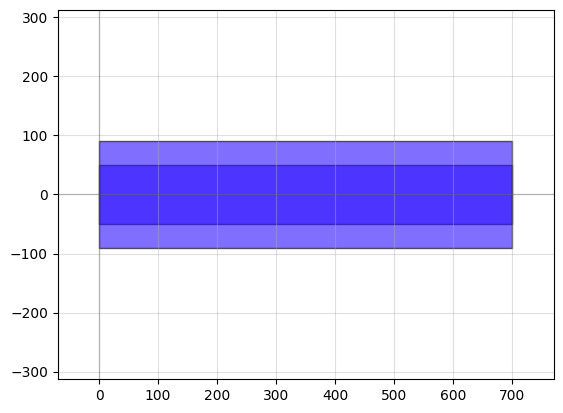

In [203]:

D ,_ = WaveGuideMaker(100,40, 700, ['in','out'])
qp(D)



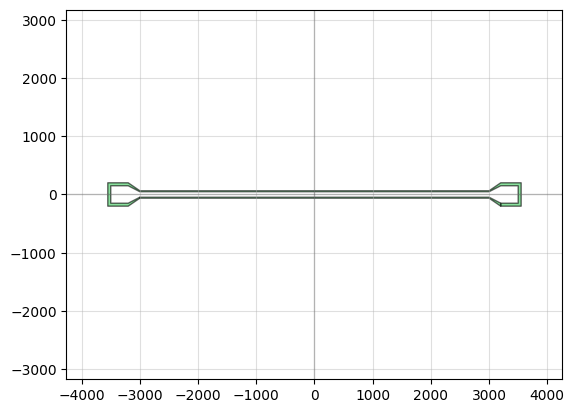

In [3]:
D = FeedLineMaker()
qp(D)

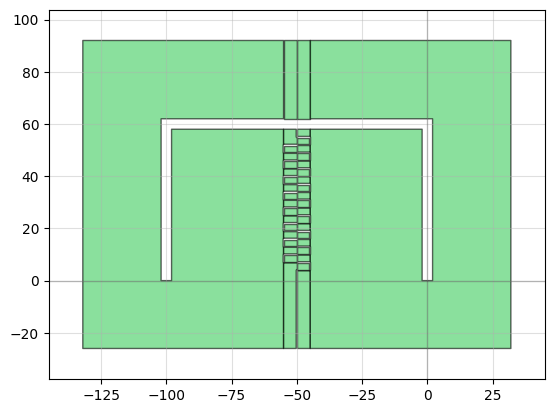

In [39]:
EtchedArea, SchusterResonatorDevice, EtchAreaBoundary_Device, length = SchusterResonator(16, 10,3,30,0.5, 4,100,60,30)
qp(EtchedArea)

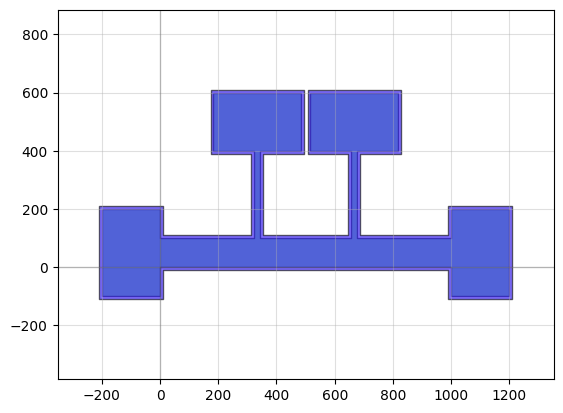

In [18]:
D= FourProbeMaker(1000, 100, 200, 300, 300, 20, 10)
qp(D)


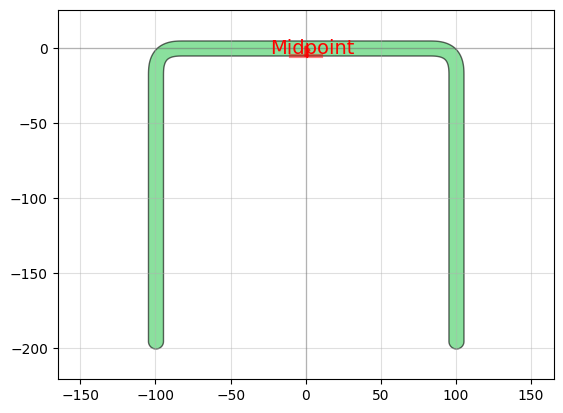

In [98]:
from resonator import CapacitorSection

CapacitorHorizontalLength = 200
CapacitorVerticalLength = 200
CapacitorWidth = 10
TaperWidth = 20

polyCap = CapacitorSection(CapacitorHorizontalLength, 
                     CapacitorVerticalLength, 
                     CapacitorWidth,
                     TaperWidth)

qp(polyCap)

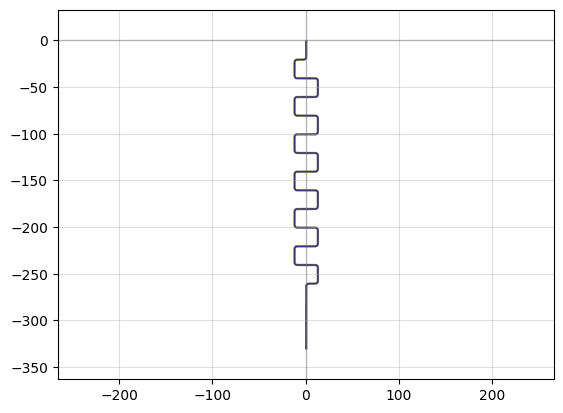

330


In [105]:
from resonator import InductorSection
 
NumberOfBends = 10
InductorVerticalLength = 20
InductorHorizontalLength = 25
EndLength = 50
InductorWidth = 1

polyInd = InductorSection(NumberOfBends, 
                    InductorVerticalLength,
                    InductorHorizontalLength,
                    EndLength,
                    InductorWidth)

qp(polyInd)
print(InductorVerticalLength*(NumberOfBends+4) + EndLength)

350 230


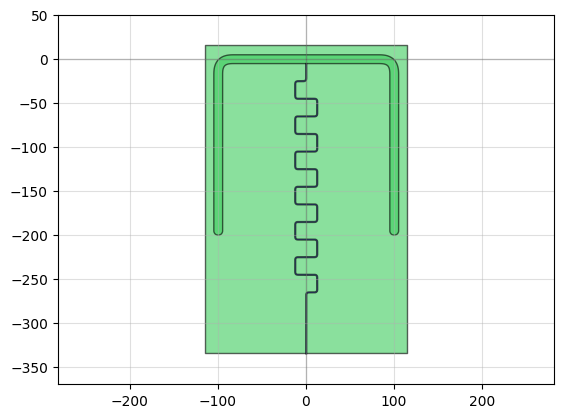

{0} {0} {1}
<class 'phidl.device_layout.Device'>


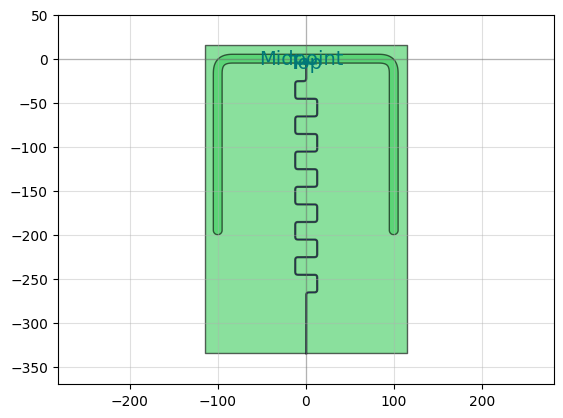

In [120]:
from resonator import SquareEtch

StraightLengthInductor = InductorVerticalLength*(NumberOfBends+4) + EndLength
SpacingC0 = 10
SpacingCc = 10


polyEtch, ysize, xsize = SquareEtch(SpacingC0, 
                   SpacingCc, 
                   StraightLengthInductor,
                   CapacitorHorizontalLength, 
                   CapacitorVerticalLength,
                   CapacitorWidth)
print(ysize, xsize)
polyEtch.move(destination= (-xsize/2, -ysize +(3/2)*CapacitorWidth))
# polyInd.movey(+CapacitorWidth/2)

phidl.set_quickplot_options(show_ports = False)
qp([polyEtch, polyCap, polyInd])
a = polyEtch.get_layers()
b = polyCap.get_layers()
c = polyInd.get_layers()
print(a,b,c)
D = Device()
Etch_ref = D << polyEtch
Cap_ref = D << polyCap
Ind_ref = D << polyInd
print(type(polyEtch))
qp(D)
# D.write_gds("output.gds")

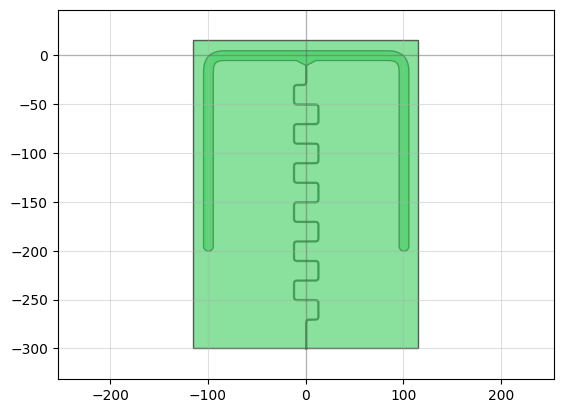

'output.gds'

In [192]:
from resonator import SchusterResonatorSmooth
TaperLength = 5

Res, etch = SchusterResonatorSmooth(CapacitorHorizontalLength, 
                            CapacitorVerticalLength, 
                            CapacitorWidth,
                            NumberOfBends, 
                            InductorVerticalLength,
                            InductorHorizontalLength,
                            InductorWidth,
                            TaperWidth,
                            TaperLength,
                            SpacingC0, 
                            SpacingCc
                            )
phidl.set_quickplot_options(show_ports = False, show_subports = False)
qp([Res, etch])
Res.add_polygon(etch.get_polygons(), layer = 1)
from Res.write_gds("output.gds", cellname="Resonator")

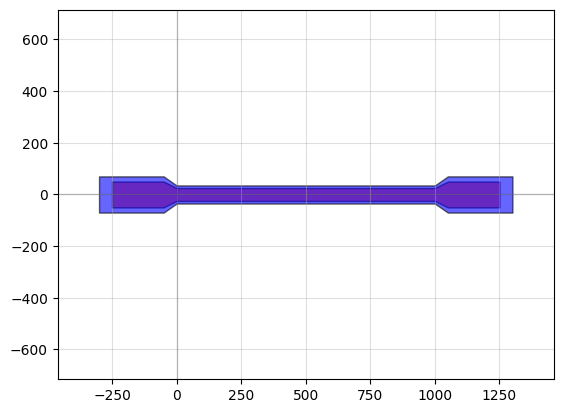

In [251]:
from resonator import Tline

FeedlineWidth = 50
FeedlineLength  = 1000
FeedlineGap = 10
FeedlineTaperLength =  50
BondpadWidth =  100
BondpadLength = 200
BondpadGap = 20

tline, tline_gap = Tline(FeedlineWidth, FeedlineLength, FeedlineGap, 
          FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap)

qp([tline, tline_gap])

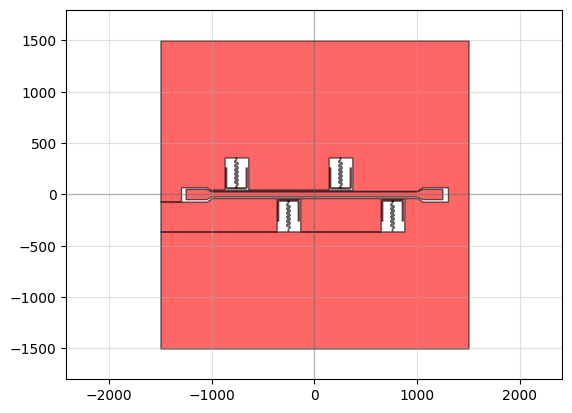

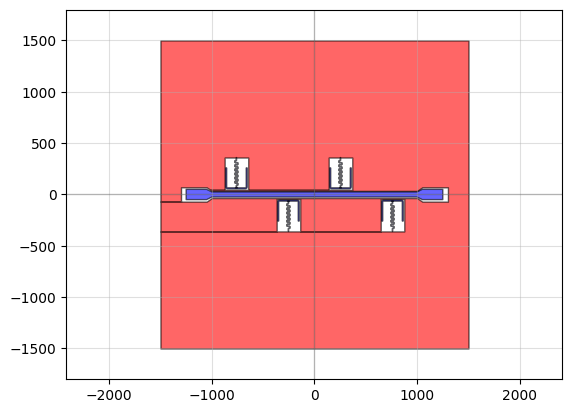

'chip_test.gds'

In [250]:
from resonator import ChipResonatorsTline

Chipsize = [3000,3000]
SeparationTlineResonator = 10
NumberOfResonators = 4
FeedlineWidth = 50
FeedlineLength  = 2000
FeedlineGap = 10
FeedlineTaperLength =  50
BondpadWidth =  100
BondpadLength = 200
BondpadGap = 20
CapacitorHorizontalLength = np.ones(NumberOfResonators)*200
CapacitorVerticalLength = np.ones(NumberOfResonators)*200
CapacitorWidth = np.ones(NumberOfResonators)*10
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*10
InductorVerticalLength = np.ones(NumberOfResonators)*20
InductorHorizontalLength = np.ones(NumberOfResonators)*25
InductorWidth = np.ones(NumberOfResonators)*1
TaperWidth = np.ones(NumberOfResonators)*20
SpacingC0 = np.ones(NumberOfResonators)*10
SpacingCc = np.ones(NumberOfResonators)*10
TaperLength = np.ones(NumberOfResonators)*5


c, metal,chip = ChipResonatorsTline(Chipsize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc)

qp([c, metal])
qp(chip)
chip.write_gds("chip_test.gds")

